In [ ]:
# carregandos as bibliotecas básicas
import numpy as np
import pandas as pd

# bibliotecas para plots
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)

In [ ]:
# leitura do dataset
df = pd.read_csv("https://pycourse.s3.amazonaws.com/bike-sharing.csv")
df.head()

,datetime,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# info básicas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           17379 non-null  object 
 1   rec_id             17379 non-null  int64  
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   is_holiday         17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   is_workingday      17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

In [ ]:
# date time conversion
df['datetime'] = pd.to_datetime(df['datetime'])

# categorical variables
df['season'] = df['season'].astype('int')
df['is_holiday'] = df['is_holiday'].astype('int')
df['weekday'] = df['weekday'].astype('int')
df['weather_condition'] = df['weather_condition'].astype('int')
df['is_workingday'] = df['is_workingday'].astype('int')
df['month'] = df['month'].astype('int')
df['year'] = df['year'].astype('int')
df['hour'] = df['hour'].astype('int')

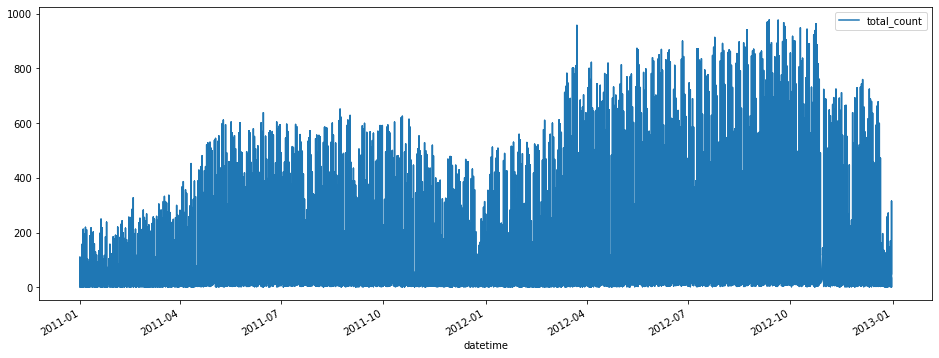

In [ ]:
# plot inicial
df.plot(x='datetime', y='total_count');

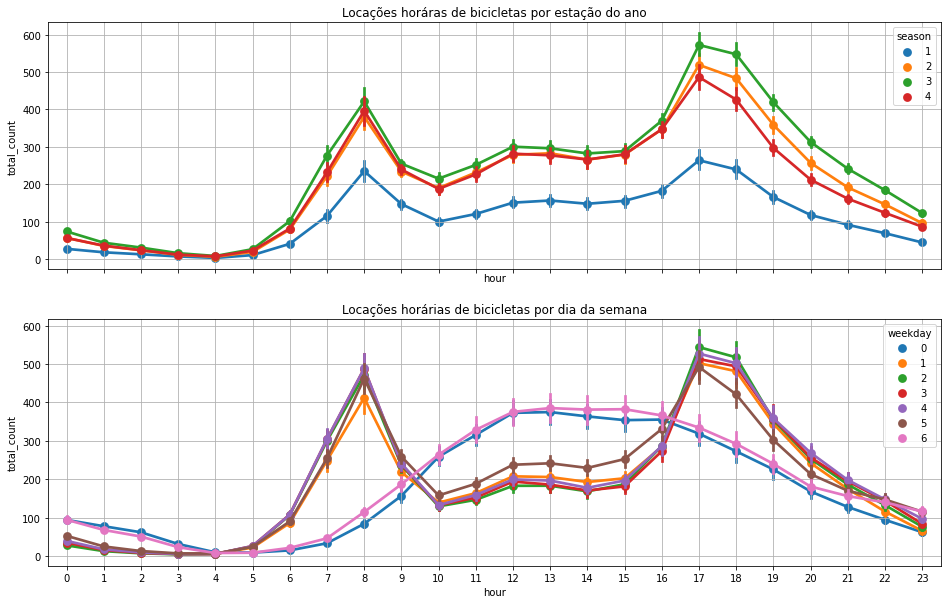

In [ ]:
# tendências horárias
_, ax = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))

sns.pointplot(data=df, x='hour', y='total_count', hue='season', ax=ax[0])
ax[0].set_title("Locações horáras de bicicletas por estação do ano")
ax[0].grid()

sns.pointplot(data=df, x='hour', y='total_count', hue='weekday', ax=ax[1])
ax[1].set_title("Locações horárias de bicicletas por dia da semana")
ax[1].grid();

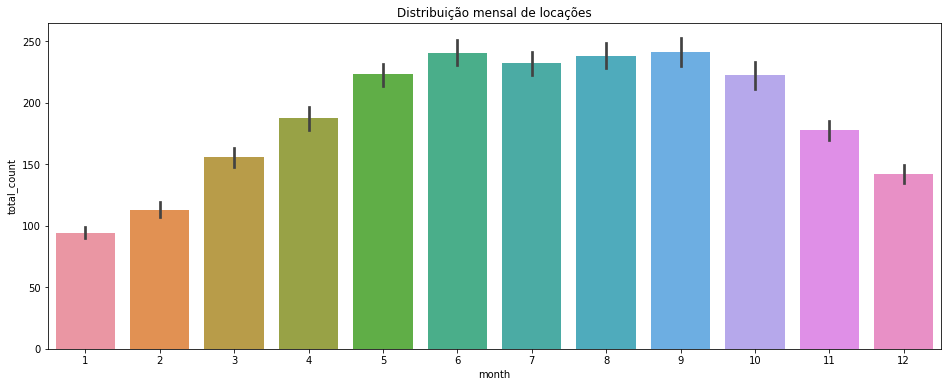

In [ ]:
# distribuição por mês
fig, ax = plt.subplots()
sns.barplot(data=df, x="month", y="total_count")
ax.set_title("Distribuição mensal de locações");

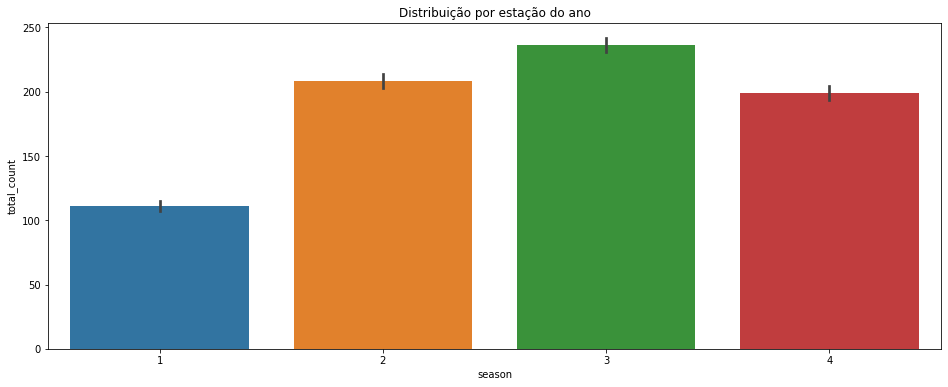

In [ ]:
# distribuição por estação do ano
fig, ax = plt.subplots()
sns.barplot(data=df, x="season", y="total_count")
ax.set_title("Distribuição por estação do ano");

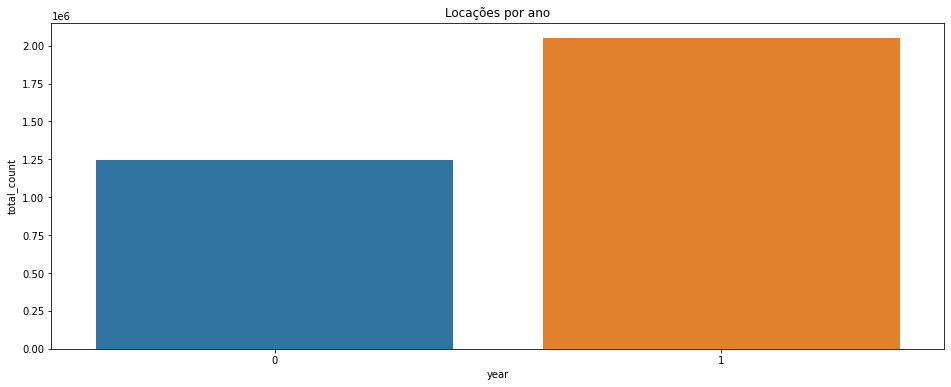

In [ ]:
# distribuição por ano
fig, ax = plt.subplots()
sns.barplot(data=df, x="year", y="total_count", estimator=sum, ci=None)
ax.set_title("Locações por ano");

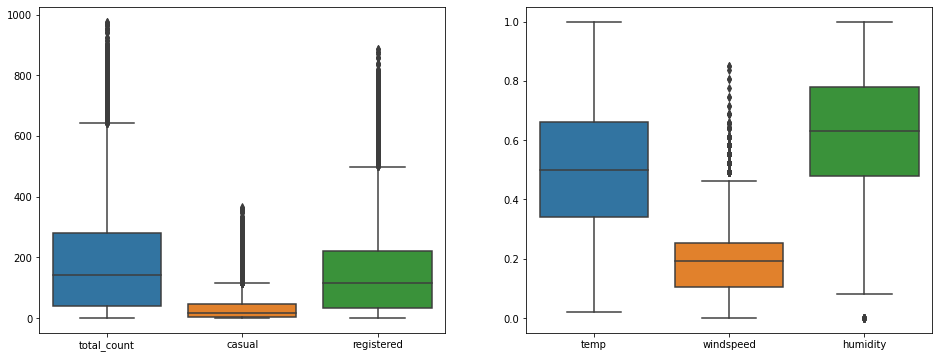

In [ ]:
# outliers
fig, ax = plt.subplots(ncols=2)
sns.boxplot(data=df[['total_count', 'casual', 'registered']], ax=ax[0])
sns.boxplot(data=df[['temp', 'windspeed', 'humidity']], ax=ax[1]);

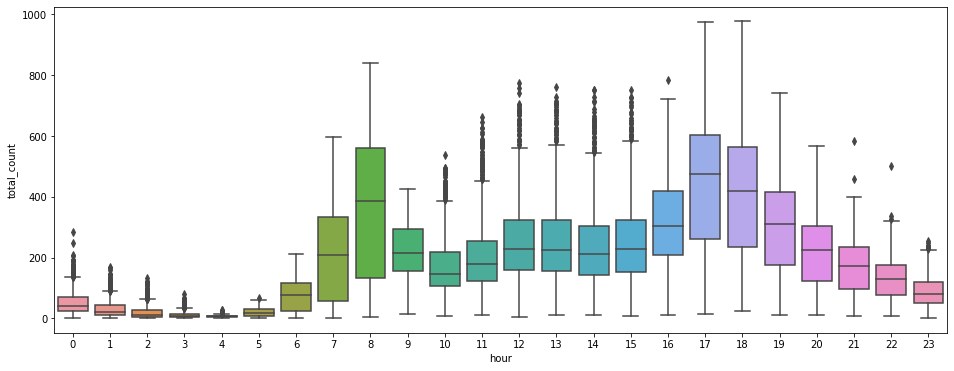

In [ ]:
# outliers: uso horário
fig, ax = plt.subplots()
sns.boxplot(data=df, x="hour", y="total_count");

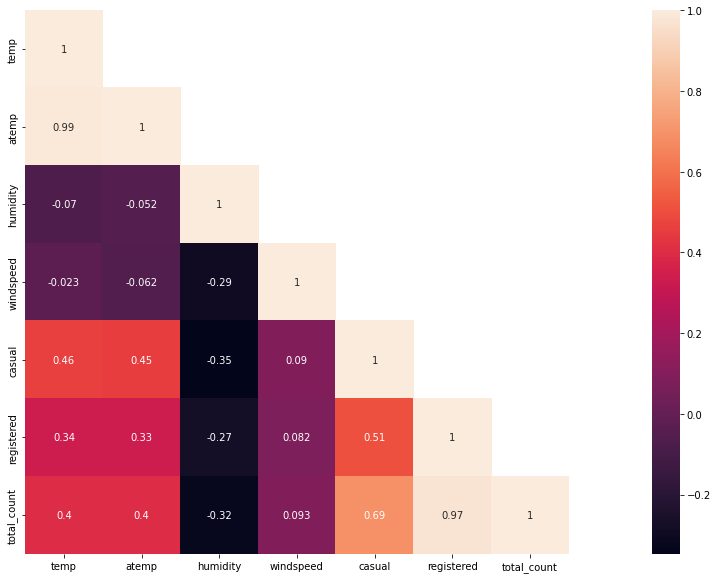

In [ ]:
# correlação
plt.figure(figsize=(30,10))

# extraindo matrix de correlação
corr_mat = df[['temp', 'atemp', 'humidity', 'windspeed',
              'casual', 'registered', 'total_count']].corr()

# visualização dos elementos abaixo da diagonal principal
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False

# plot
sns.heatmap(corr_mat, mask=mask, square=True, annot=True)
plt.show()